# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

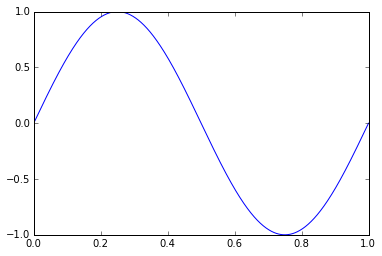

In [33]:
f = 1.0
t = np.linspace(0,1, num = 1000 )
x = np.sin(2*np.pi*f*t)

plt.figure()
plt.plot(t, x)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

<Container object of 3 artists>

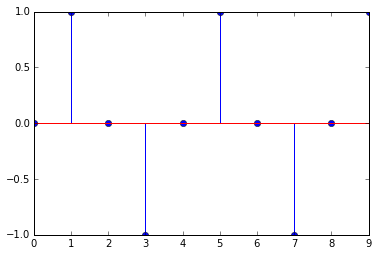

In [51]:
fs = 4
n = np.arange(10)

x = np.sin(2*np.pi*(1.0/fs)*n)
plt.stem(x)

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

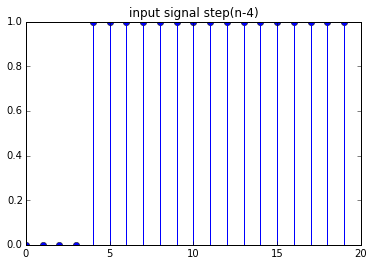

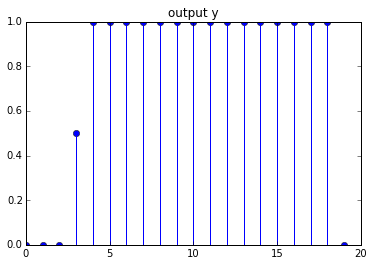

In [22]:
def step(n = 0, N = 20):
    if ( (n >= 0) and (n < N) ):
        x = np.zeros((N, 1))
        for i in range(n, N):
            x[i] = 1
        return(x)
    else:
        print ('error! n in undefined range')

x = step(4)
y = np.zeros(x.shape)
for i in range(0, len(x) - 1):
    y[i] = (x[i] + x[i+1])/2

plt.stem(x)
plt.title('input signal step(n-4)')

plt.figure()
plt.stem(y)
plt.title('output y')

**1.2** Propose a modification to obtain a causal version

<Container object of 3 artists>

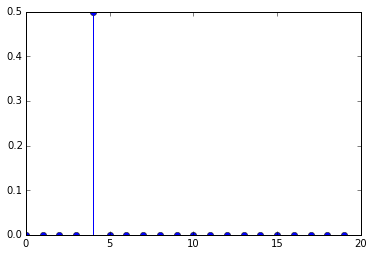

In [28]:
#we could define Y[k] = (X[k] - X[k-1])/2
y_c = np.zeros(x.shape)
for i in range(1, len(x)):
    y_c[i] = (x[i] - x[i-1])/2

plt.figure()
plt.stem(y_c)

#comments
#In the previous example, the output starts before the signal.
#In the suggested output, the output does not start before
#the signal, and hence is causal

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



<Container object of 3 artists>

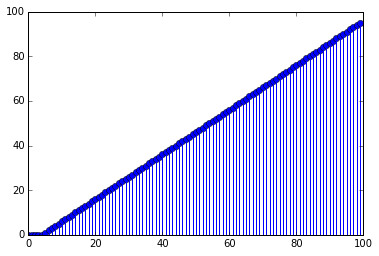

In [53]:
#create signal for the accumulator operator
f = step(4, 100)

#initialize the primitive (accumulator) operator
prim = np.zeros(f.shape) 
for i in range(0, len(prim)):
    prim[i] = sum(f[0:i])

plt.stem(prim)

#Discussion
#The operator is not stable since its output grows monotonically
#As n becomes very large, the output grows unbounded for an 
#input that is always bounded (so it does not have BIBO stability)


**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

<Container object of 3 artists>

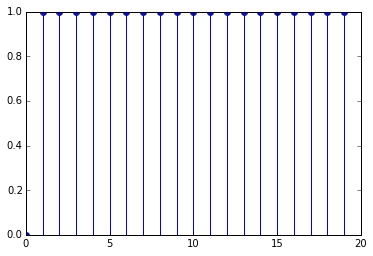

In [57]:
def dirac(n=0, N=20):
    
    if ( ( n >= 0 ) and (n < N) ):
        s = np.zeros((N,1))
        s[n] = 1
        return(s)
    else: 
        print ('error! n in undefined range')

impulse = dirac(0)

#initialize the primitive (accumulator) operator
prim = np.zeros(impulse.shape) 
for i in range(0, len(prim)):
    prim[i] = sum(impulse[0:i])
    
plt.stem(prim)

#It is the heaviside step.


**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

<Container object of 3 artists>

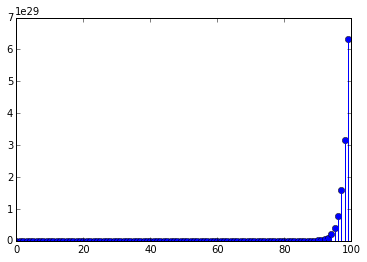

In [64]:
impulse = dirac(0, 100)
y = np.zeros(impulse.shape)

for i in range(0, len(y)):
    y[i] = impulse[i] + 2*y[i-1]

plt.stem(y)

#The output grows unbounded for bounded input (impulse). 
#Hence, this system is BIBO unstable.

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

<Container object of 3 artists>

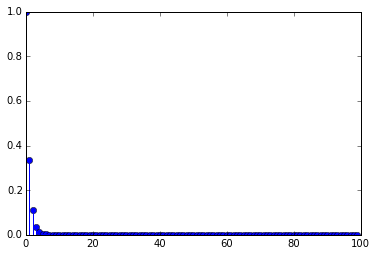

In [65]:
impulse = dirac(0, 100)
y = np.zeros(impulse.shape)

for i in range(0, len(y)):
    y[i] = impulse[i] + y[i-1]/3.0

plt.stem(y)

#This system is BIBO stable since the output decays and goes to 
#zero for impulse input; hence, it is BIBO stable since it has
#finite power/energy.

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


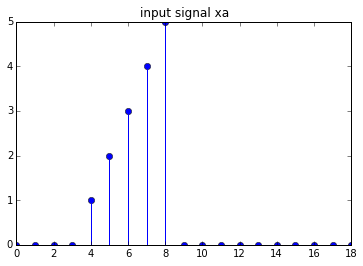

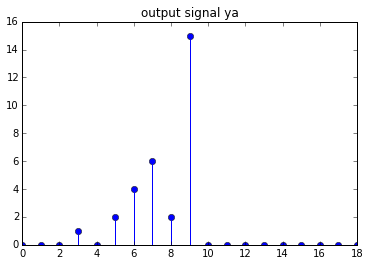

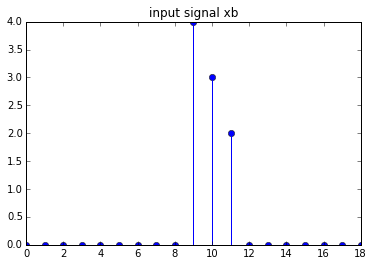

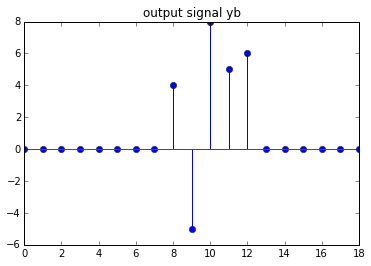

In [78]:
def customSystem(x):
    y = np.zeros(len(x))
    for i in range(0, len(x)-1):
        if (i==0):
            y[i] = -2*x[i] + x[i+1]
        else:
            y[i] = 3*x[i-1] - 2*x[i] + x[i+1]
    
    return(y)

xa = np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
xb = np.array([0,0,0,0,0,0,0,0,0,4,3,2,0,0,0,0,0,0,0])

ya = customSystem(xa)
yb = customSystem(xb)

plt.figure()
plt.stem(xa)
plt.title('input signal xa')
plt.figure()
plt.stem(ya)
plt.title('output signal ya')

plt.figure()
plt.stem(xb)
plt.title('input signal xb')
plt.figure()
plt.stem(yb)
plt.title('output signal yb')




**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


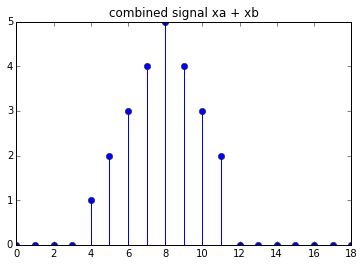

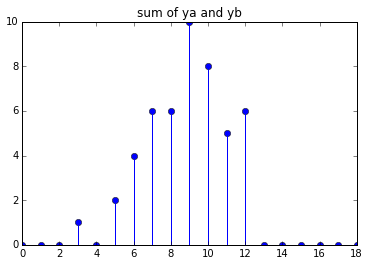

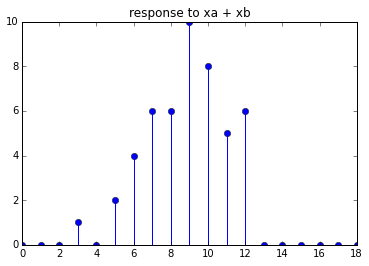

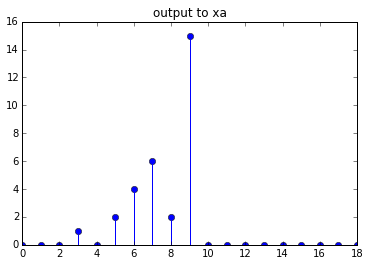

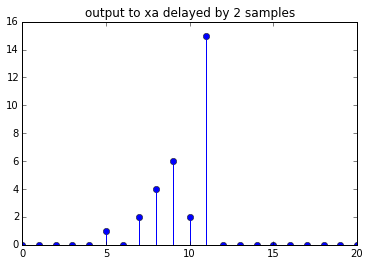

In [81]:
#to show that the system is linear
x = xa + xb
y1 = ya + yb
y2 = customSystem(x)

plt.figure()
plt.stem(x)
plt.title('combined signal xa + xb')

plt.figure()
plt.stem(y1)
plt.title('sum of ya and yb')

plt.figure()
plt.stem(y2)
plt.title('response to xa + xb')

#to show that the system is time invariant
#delay xa by 2 samples
xa_d = np.array([0,0,0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
ya_d = customSystem(xa_d)

plt.figure()
plt.stem(ya)
plt.title('output to xa')
plt.figure()
plt.stem(ya_d)
plt.title('output to xa delayed by 2 samples')

#since delaying the input also delays the output by 2 samples, 
#the output is time invariant


**3.3** Propose a nonlinear/noninvariant system.

In [ ]:
#y[n] = n*sin(2*pi*n)